In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.integrate as integrate

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

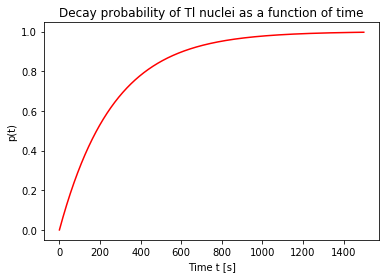

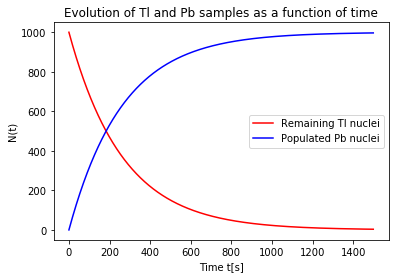

In [2]:
tau_min = 3.052 #minutes
tau_sec = 3.052*60
N_Tl = 1000
N_Pb = 0
steps = 1  #seconds

#CDF: describes the number of decayed nuclei
def cdf(x): 
    return (1-2**(-x/tau_sec))

plt.figure()
X = np.arange(0,1500, 1)
plt.plot(X, cdf(X), color="red")
plt.xlabel("Time t [s]")
plt.ylabel("p(t)")
plt.title("Decay probability of Tl nuclei as a function of time")

#define the number of remaining Tl nuclei 
def n_Tl(x):
    """Number of remaining Tl nuclei"""
    return (N_Tl - N_Tl*cdf(x))

#define the number of produced Pb nuclei
def n_Pb(x):
    """Number of populated Pb nuclei"""
    return (N_Pb + N_Tl*cdf(x))

plt.figure()
plt.plot(X, n_Tl(X), color="red", label='Remaining Tl nuclei') # plot exponential CDF
plt.plot(X, n_Pb(X), color="blue", label='Populated Pb nuclei')
plt.xlabel("Time t[s]")
plt.ylabel("N(t)")
plt.title("Evolution of Tl and Pb samples as a function of time")
plt.legend(loc='best')

Text(0.5, 1.0, 'Remaining Tl nuclei')

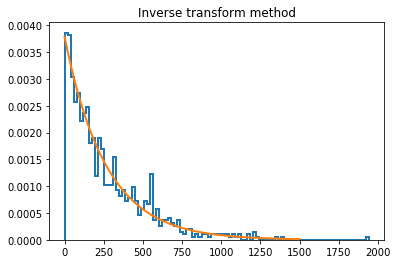

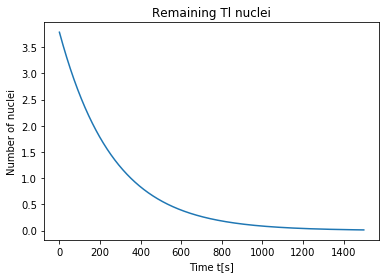

In [9]:
#INVERSE TRANSFORM METHOD
def pdf(x):  #PDF: describes the number of non decayed nuclei
    return (np.log(2)/tau_sec)*2**(-x/tau_sec)

def ipdf(x):  #inverse PDF
    return -tau_sec*np.log2(1-x)

r = np.random.random(1000)  #generate 1000 random numbers that simulate the number of decays
f = ipdf(r)  

plt.hist(f, histtype='step', bins=100, density=True, linewidth=2) 
plt.plot(X, pdf(X), linewidth=2)  # plot exponential PDF
plt.title("Inverse transform method")


#plot the number of atoms that have not decayed as a function of time
plt.figure()
plt.plot(X, N_Tl*pdf(X))
plt.xlabel("Time t[s]")
plt.ylabel("Number of nuclei")
plt.title("Remaining Tl nuclei")

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

Number of iterations: 10

HIT/MISS METHOD:
Integral mean value =  1.3434000000000001 
Standard deviation =  0.013407758947713838

MEAN VALUE METHOD:
Integral mean value =  1.3463995853704176 
Standard deviation =  2.220446049250313e-16


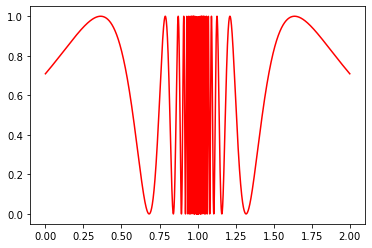

In [10]:
def f(x):
    return (np.sin(1/(1-x)))**2

N = 10 #number of iteration
print("Number of iterations:", N)
n = 10000
x=np.linspace(0.001, 1.999, n)
plt.plot(x, f(x), 'r-')

#HIT/MISS METHOD
integr_hm = []
for j in range(N):
    count = 0
    for i in range(n):
        x = 2 * np.random.random() 
        y = np.random.random()     
        if y < f(x): count += 1
    I = 2 * count / n
    integr_hm.append(I)

mu_hm = np.sum(integr_hm)/len(integr_hm) #mean value
quadr = []
for k in range(N):
    quadr.append((integr_hm[k] - mu_hm)**2)
stdev_hm = np.sqrt(np.sum(quadr)/N)
print("\nHIT/MISS METHOD:\nIntegral mean value = ", mu_hm, "\nStandard deviation = ", stdev_hm)

#MEAN VALUE METHOD
n = 10000
x=np.linspace(0.001, 1.999, n)
integr_mv = []
for j in range(N):
    I_mean = (2/n)*np.sum(f(x))
    integr_mv.append(I_mean)
    
mu_mv = np.sum(integr_mv)/len(integr_mv) #mean value
quadr_mv = []
for k in range(N):
    quadr_mv.append((integr_mv[k] - mu_mv)**2)
stdev_mv = np.sqrt(np.sum(quadr_mv)/N)
print("\nMEAN VALUE METHOD:\nIntegral mean value = ", mu_mv, "\nStandard deviation = ", stdev_mv)

OBSERVATION: Comparing the two methods we can see how the error in the integral estimation is smaller for the mean value method. 

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [11]:
def f(x, y):
    return x**2 + y**2

n = 1000
x = np.linspace(-1,1,n)
y = np.linspace(-1,1,n)

#estimate the integral with mean value method
I = (2/n)*np.sum(f(x, y))
print("The area of the 2-dim circle is:", I)

#in 10D:
def f10(z):
    return np.sum(z**2)
z = np.array([x for i in range(10)])

I_10 = (2/n)*np.sum(f10(z))
print("The area of a 10-dim sphere is:", I_10)

The area of the 2-dim circle is: 1.3360026693360028
The area of a 10-dim sphere is: 6.6800133466800125


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [12]:
def f(x):
    return np.power(x, -1/2)/(np.exp(x)+1)

def w(x):
    return 1/np.sqrt(x)

#estimation of the integral of w(x) between 0 and 1: 2*radq(x)
intW = 2

N = 1000
x = np.linspace(0.0001,1,N)

I = (1.0/N)*np.sum(f(x)/w(x))*intW
print("The integral obtained with the importance sampling method is:", I)

The integral obtained with the importance sampling method is: 0.7597561416438907
